Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:

try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('D:/Yandex/games.csv')

In [3]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.tail(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


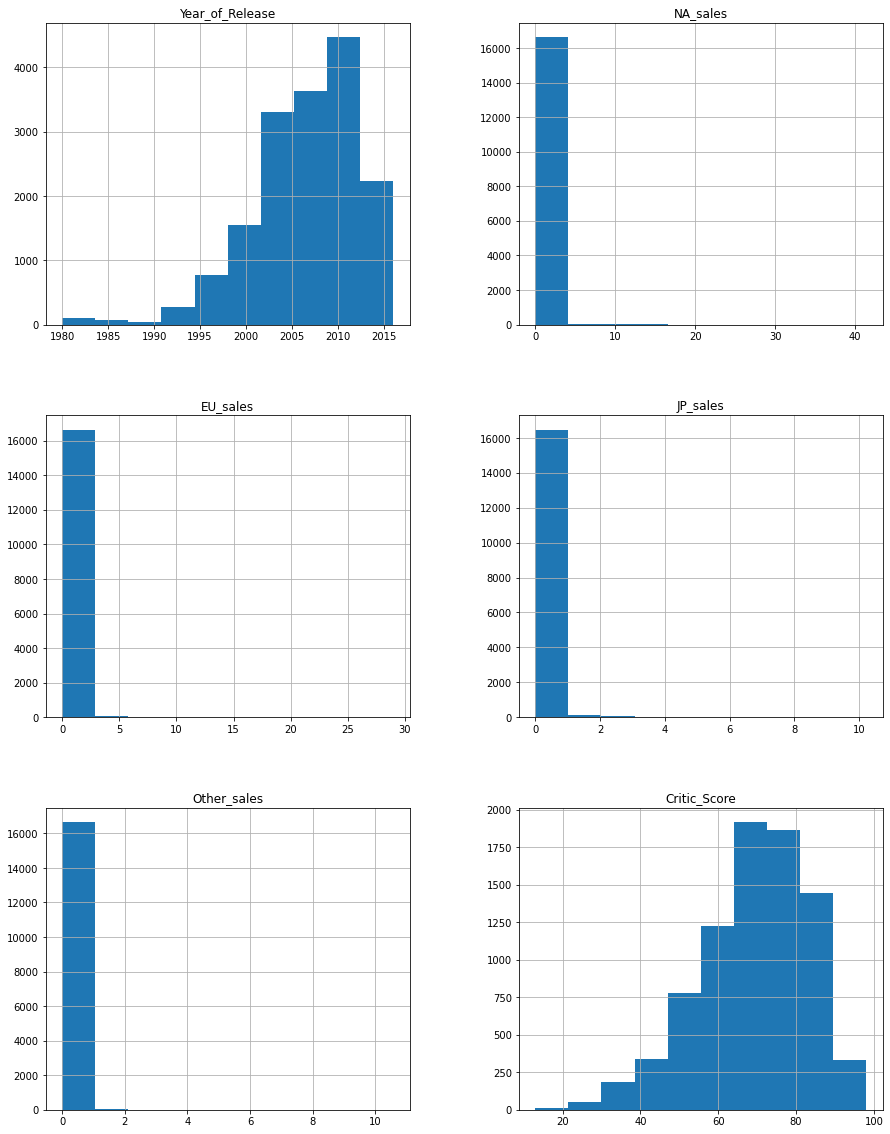

In [6]:
df.hist(figsize=(15, 20));

Привести к нижнему регистру названия столбцов. Изменить тип данных в Year_of_Release на int. Обработать пропуски, там где это возможно.

# 2. Подготовьте данные

In [7]:
# Замените названия столбцов (приведите к нижнему регистру)
df.columns = df.columns.str.lower()

In [8]:
# Обработайте пропуски при необходимости:
df.isnull().sum()
df.duplicated().sum()
df.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)

In [9]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


In [10]:
# Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему
df['year_of_release'] = df['year_of_release'].astype('int')

Год выпуска меняем на целочисленное значение.

In [11]:
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [12]:
# tbd To Be Determined означает будет определено, в данный момент неизвестно
df.loc[df['user_score'] == 'tbd', 'user_score'] = 'nan'
df['user_score'] = df['user_score'].astype('float')

In [13]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [14]:
# Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [15]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Привели к нижнему регистру названия столбцов. Обработали пропуски. tbd заменили на nan. Изменили формат данных и добавили столбец с суммарными продажами.

# Шаг 3. Проведите исследовательский анализ данных

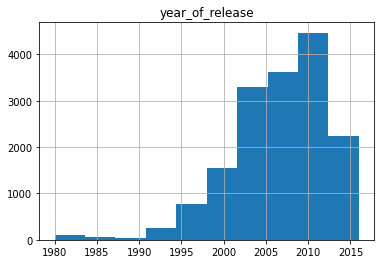

In [16]:
# Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
df.hist('year_of_release');

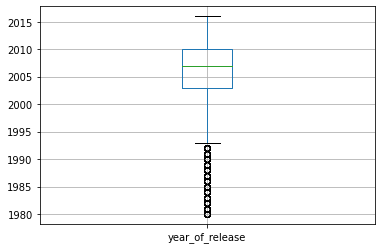

In [17]:
df.boxplot('year_of_release');

In [18]:
df.drop(index=df.query('year_of_release < 1995').index,inplace=True)
df['year_of_release'].unique()

array([2006, 2008, 2009, 1996, 2005, 1999, 2007, 2010, 2013, 2004, 2002,
       2001, 2011, 1998, 2015, 2012, 2014, 1997, 2016, 2003, 2000, 1995])

In [19]:
# Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,721.55
PS4,314.14
GBA,312.88
PSP,289.53


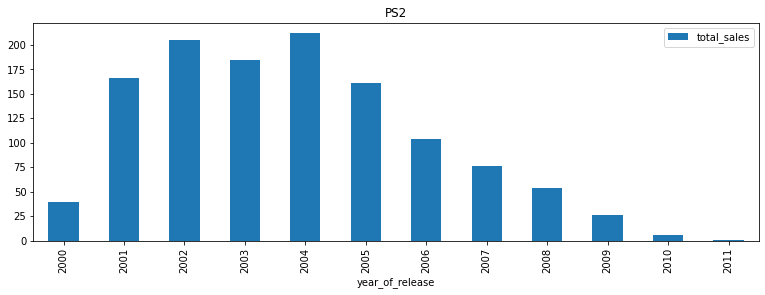

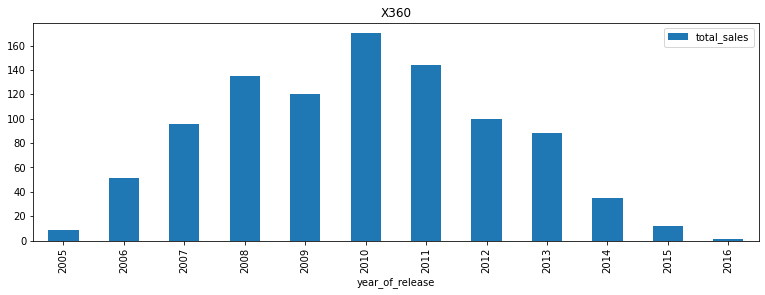

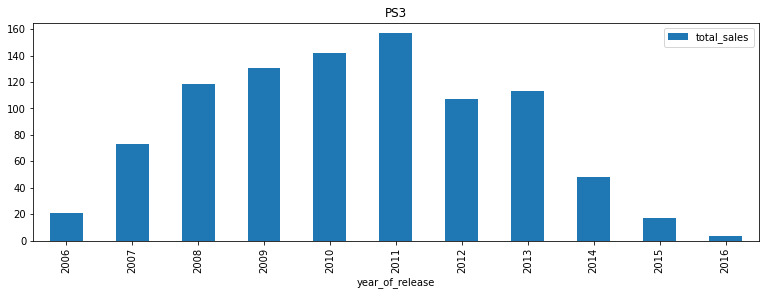

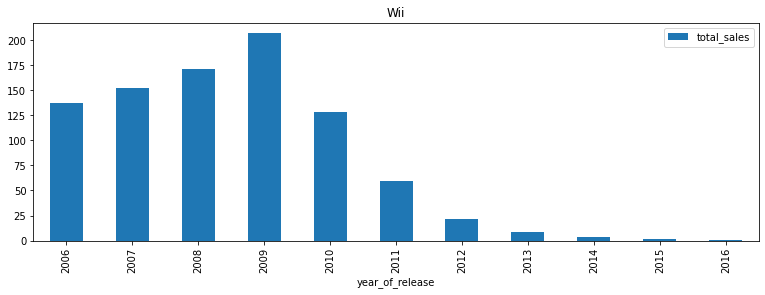

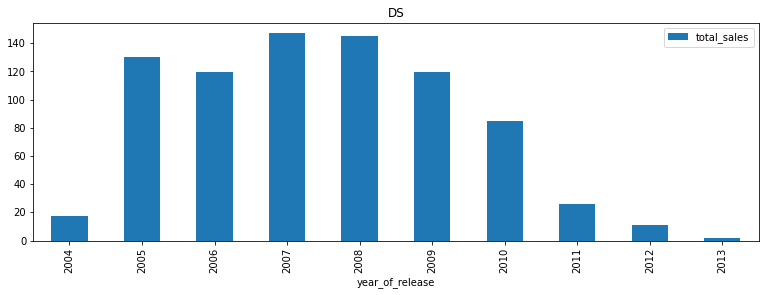

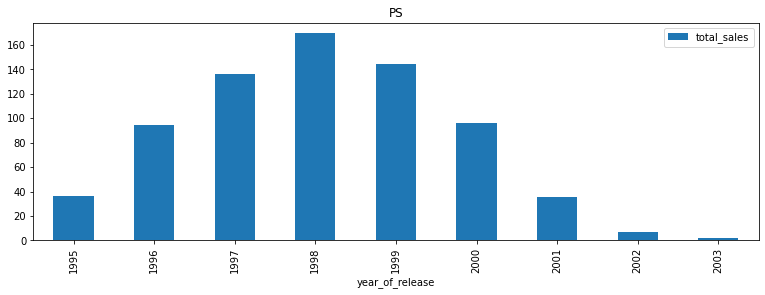

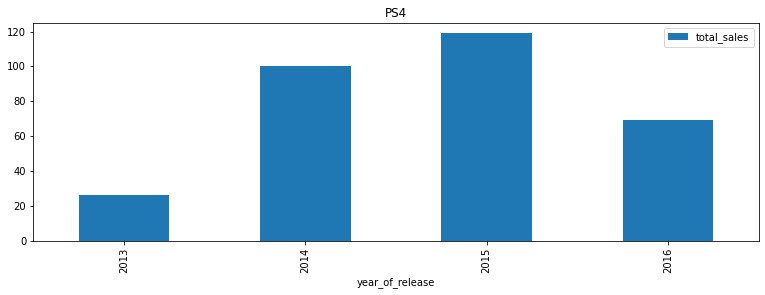

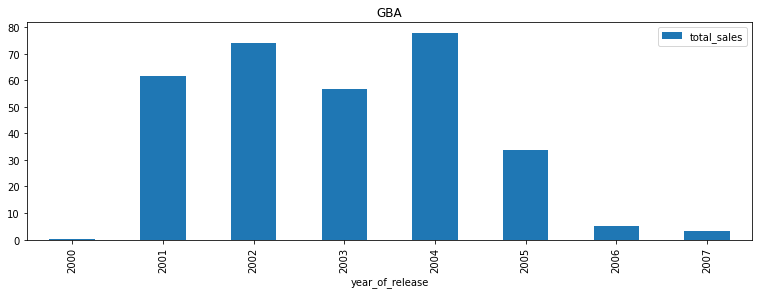

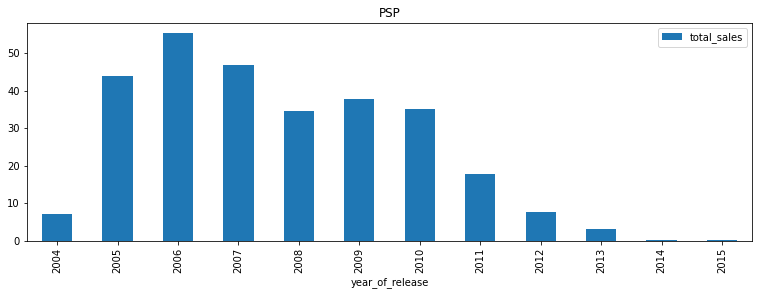

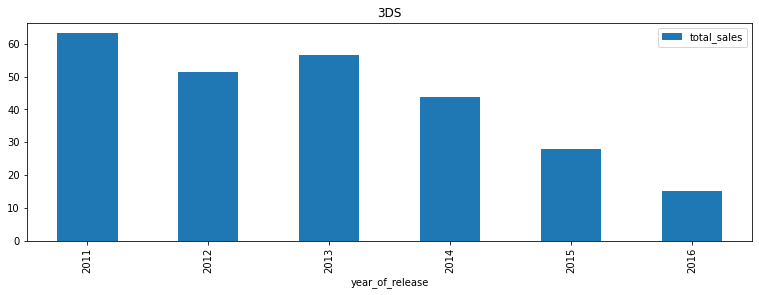

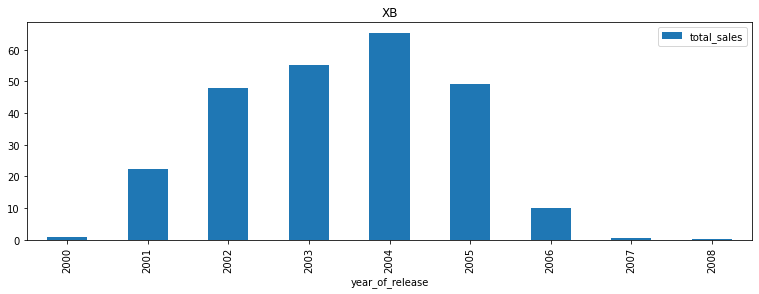

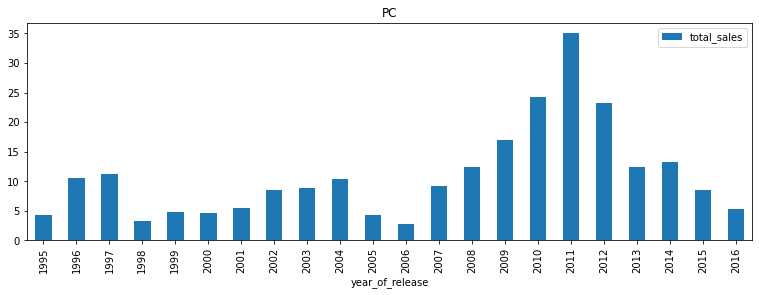

In [20]:
top = ["PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4", "GBA", "PSP", "3DS", "XB", "PC"]
for platform in top:
    df[df['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4))
    plt.title(platform)

Срок жизни платформы примерно 10 лет.
PC - главный долгожитель, от рассвета до заката.

In [21]:
# Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
df2016 = df[df['year_of_release'] == 2016].reset_index(drop=True)
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             502 non-null    object 
 1   platform         502 non-null    object 
 2   year_of_release  502 non-null    int64  
 3   genre            502 non-null    object 
 4   na_sales         502 non-null    float64
 5   eu_sales         502 non-null    float64
 6   jp_sales         502 non-null    float64
 7   other_sales      502 non-null    float64
 8   critic_score     232 non-null    float64
 9   user_score       262 non-null    float64
 10  rating           280 non-null    object 
 11  total_sales      502 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 47.2+ KB


In [22]:
df2016

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
1,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14
2,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
3,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
4,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07
...,...,...,...,...,...,...,...,...,...,...,...,...
497,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
498,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
499,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
500,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [23]:
# Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
df2016['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

In [24]:
df2016.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,46.0,0.329130,1.058533,0.01,0.0300,0.080,0.2100,7.14
PC,54.0,0.097222,0.135916,0.01,0.0200,0.035,0.1200,0.65
PS3,38.0,0.094737,0.120556,0.01,0.0300,0.065,0.1200,0.73
PS4,164.0,0.422256,0.968877,0.01,0.0300,0.085,0.3525,7.60
PSV,85.0,0.050000,0.056273,0.01,0.0200,0.030,0.0600,0.30
Wii,1.0,0.180000,NaN,0.18,0.1800,0.180,0.1800,0.18
WiiU,14.0,0.328571,0.348135,0.01,0.0475,0.215,0.4075,1.03
X360,13.0,0.116923,0.114483,0.02,0.0400,0.100,0.1200,0.38
XOne,87.0,0.300575,0.549133,0.01,0.0200,0.060,0.2750,2.65


Можно веделить двух основных конкурентов: PS4 и XOne.

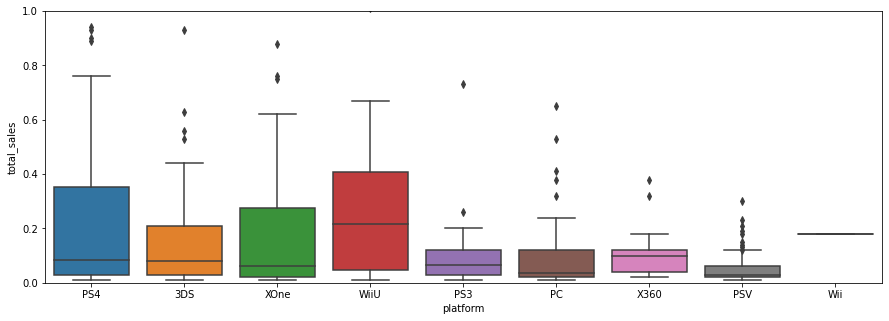

In [25]:
# Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
plt.figure(figsize=(15, 5))
sns.boxplot(data=df2016, x='platform', y='total_sales')
plt.ylim(0, 1);

Лидеры: PS4, XOne, WiiU, 3DS.

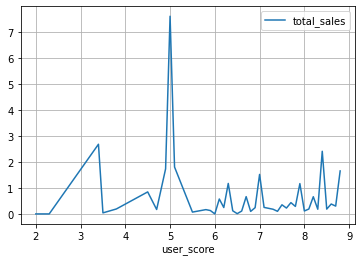

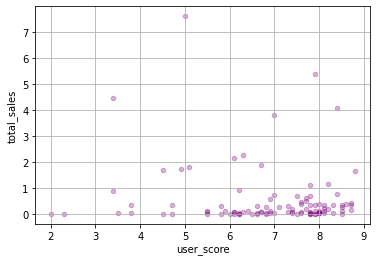

In [26]:
# Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
df2016[df2016['platform'] == 'PS4'].pivot_table(index='user_score', values='total_sales').plot(grid=True)
df2016[df2016['platform'] == 'PS4'].plot(x='user_score', y='total_sales', kind='scatter', grid=True, alpha=0.3, color='purple');

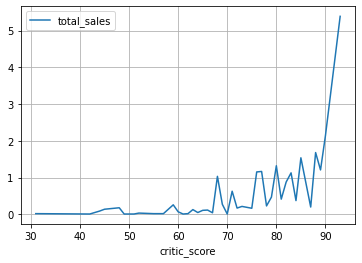

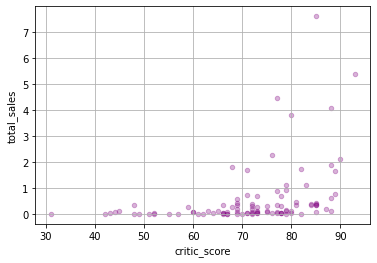

In [27]:
df2016[df2016['platform'] == 'PS4'].pivot_table(index='critic_score', values='total_sales').plot(grid=True)
df2016[df2016['platform'] == 'PS4'].plot(x='critic_score', y='total_sales', kind='scatter', grid=True, alpha=0.3, color='purple');

In [28]:
df2016[df2016['platform'] == 'PS4'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.375695,-0.122461
critic_score,0.375695,1.000000,0.480147
user_score,-0.122461,0.480147,1.000000


Корреляция есть между отзывами критиков и продажами, отзывы пользователей практически не влияют на продажи.

In [29]:
# Соотнесите выводы с продажами игр на других платформах.
df2016[df2016['platform'] == 'XOne'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.412005,-0.130303
critic_score,0.412005,1.000000,0.426034
user_score,-0.130303,0.426034,1.000000


In [30]:
df2016[df2016['platform'] == 'WiiU'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.00000,0.486490,0.437630
critic_score,0.48649,1.000000,0.935733
user_score,0.43763,0.935733,1.000000


In [31]:
df2016[df2016['platform'] == 'PC'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.254152,0.116183
critic_score,0.254152,1.000000,0.465728
user_score,0.116183,0.465728,1.000000


In [32]:
df2016[df2016['platform'] == '3DS'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.338408,0.373365
critic_score,0.338408,1.000000,0.721313
user_score,0.373365,0.721313,1.000000


Корреляция есть между отзывами критиков и продажами, отзывы пользователей практически не влияют на продажи. 
Исключение: WiiU и 3DS, где оценка пользователей также важна.

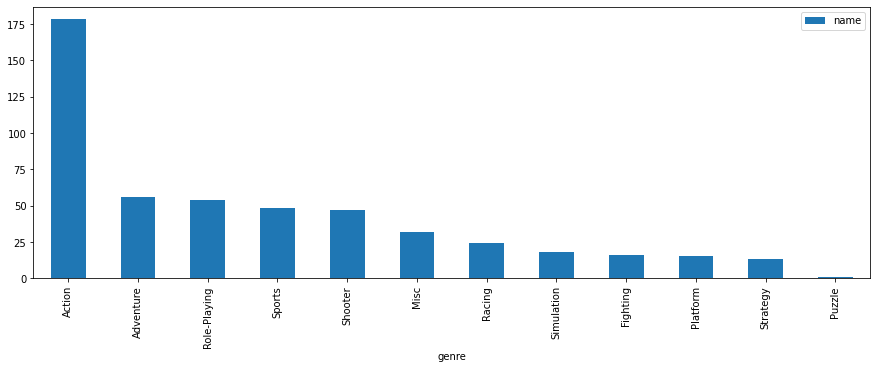

In [33]:
# Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
df2016.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False).plot.bar(figsize=(15,5));

In [34]:
df2016.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False)

,name
genre,
Action,178
Adventure,56
Role-Playing,54
Sports,48
Shooter,47
Misc,32
Racing,24
Simulation,18
Fighting,16


Можно выделить пять жанров игр:
- Action	   178
- Adventure	   56
- Role-Playing 54
- Sports	   48
- Shooter	   47

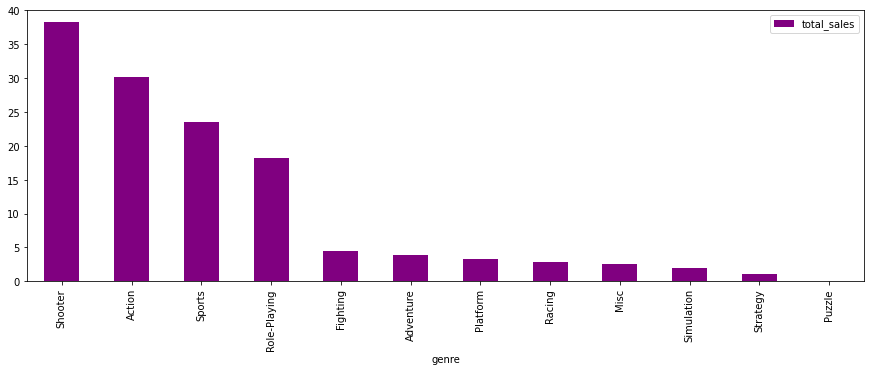

In [35]:
df2016.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot.bar(figsize=(15,5), color='purple');

In [36]:
df2016.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,38.22
Action,30.11
Sports,23.49
Role-Playing,18.18
Fighting,4.47
Adventure,3.82
Platform,3.23
Racing,2.79
Misc,2.60


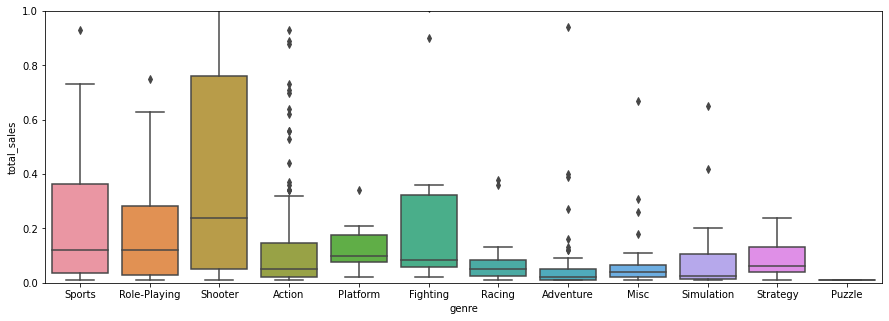

In [37]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df2016, x='genre', y='total_sales')
plt.ylim(0, 1);

In [38]:
df2016.pivot_table(index='genre', values=['total_sales'], aggfunc=['median', 'mean'])

,median,mean
,total_sales,total_sales
genre,,
Action,0.050,0.169157
Adventure,0.020,0.068214
Fighting,0.085,0.279375
Misc,0.040,0.081250
Platform,0.100,0.215333
Puzzle,0.010,0.010000
Racing,0.050,0.116250
Role-Playing,0.120,0.336667


Топ прибыльных жанров:
- Shooter
- Sports
- Role-Playing

Платформа: PS4, XOne, WiiU, 3DS, PC.
Жанр: Shooter, Sports, Role-Playing.
Оценка критиков от 67.

# 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

In [39]:
# Самые популярные платформы (топ-5). Опишите различия в долях продаж.
df2016.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head()

,na_sales
platform,
PS4,21.49
XOne,14.27
3DS,4.14
WiiU,2.10
PC,1.36


In [40]:
df2016.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head()

,eu_sales
platform,
PS4,31.78
XOne,9.63
PC,3.53
3DS,2.33
WiiU,1.48


In [41]:
df2016.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head()

,jp_sales
platform,
3DS,8.03
PS4,5.74
PSV,3.56
PS3,1.30
WiiU,0.67


В NA и EU идентичный топ 5 платформ, самая популярная платформа PS4. В JP на первом месте 3DS, 2-4 место занимают разновидности PlayStation(родина).

In [42]:
# Самые популярные жанры (топ-5). Поясните разницу.
df2016.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head()

,na_sales
genre,
Shooter,16.24
Action,9.29
Sports,7.54
Role-Playing,5.89
Fighting,1.84


In [43]:
df2016.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head()

,eu_sales
genre,
Shooter,15.90
Sports,12.01
Action,10.68
Role-Playing,4.28
Racing,1.77


In [44]:
df2016.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head()

,jp_sales
genre,
Action,7.07
Role-Playing,6.61
Adventure,1.18
Shooter,1.06
Misc,1.04


Топ 4 в NA и EU идентичный, отличается только жанр на 5 месте Fighting и Racing соответственно.
В JP подавляющее большинство за Action и Role-Playing. На 5 месте Misc.

In [45]:
# Влияет ли рейтинг ESRB на продажи в отдельном регионе?
df2016[['na_sales', 'rating']].pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

,na_sales
rating,
M,15.67
T,8.95
E,7.97
E10+,3.81


In [46]:
df2016[['eu_sales', 'rating']].pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

,eu_sales
rating,
M,16.54
E,13.61
T,9.79
E10+,3.81


In [47]:
df2016[['jp_sales', 'rating']].pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

,jp_sales
rating,
T,2.27
M,1.20
E,1.07
E10+,0.45


В NA и EU преобладают игры с рейтингом M. В JP с рейтингом T, особенность Японского рынка.

- M Mature Для взрослых
- T Teen Для подростков
- E Everyone Для всех
- E10+ Everyone 10 and older Для всех от 10 лет и старше

# 5. Проверьте гипотезы

In [48]:
# Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
alpha = .05

results = st.ttest_ind(df2016[df2016['platform'] == 'XOne']['user_score'].dropna(), df2016[df2016['platform'] == 'PC']['user_score'].dropna())

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.33981967396516377
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные.

In [49]:
# Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
alpha = .05

results = st.ttest_ind(df2016[df2016['genre'] == 'Action']['user_score'].dropna(), df2016[df2016['genre'] == 'Sports']['user_score'].dropna())

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.000347482871898091
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

# 6. Напишите общий вывод

Срок жизни платформы примерно 10 лет. PC - главный долгожитель.
Корреляция есть между отзывами критиков и продажами, отзывы пользователей практически не влияют на продажи. Исключение: WiiU и 3DS, где оценка пользователей также важна.
В NA и EU идентичный топ 5 платформ, самая популярная платформа PS4. В JP на первом месте 3DS, 2-4 место занимают разновидности PlayStation.
Топ 4 жанра в NA и EU идентичный, отличается только жанр на 5 месте Fighting и Racing соответственно. В JP подавляющее большинство за Action и Role-Playing. На 5 месте Misc.
В NA и EU преобладают игры с рейтингом M. В JP с рейтингом T, особенность Японского рынка.


Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports разные.

Основные закономерности определяющие успешность игры.

Жанр:
- Shooter
- Sports
- Role-Playing

Платформа:
- PS4
- XOne
- WiiU
- 3DS

Оценка критиков от 67.

Рейтинг ESRB:
M Mature Для взрослых
T Teen Для подростков
E Everyone Для всех

Если потребуется выделить только одну игру: жанр - Shooter, платформа - PS4, оценка критиков > 90, рейтинг ESRB M Mature Для взрослых.